### ABOUT DATASET
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

**Attribute Information**
1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient.

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')

In [103]:
data=pd.read_csv('dataset.csv')

In [104]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [105]:
data.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


Exploratory Data Analysis

In [106]:
#Checking for null values
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [107]:
data.duplicated().sum()

np.int64(0)

In [108]:
list(data.columns)

['id',
 'gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [110]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Performing Operations

Droping Columns 

In [111]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [112]:
data['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [113]:
data[data['gender']=='Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [114]:
data = data.drop(data[data['gender'] == 'Other'].index, axis=0)

In [115]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [116]:
data['stroke'].value_counts()

stroke
0    4860
1     249
Name: count, dtype: int64

Our target variable shows that 95% of the data represents patients who are not affected by stroke, while 5% of the data corresponds to patients who have experienced a stroke.

In [142]:

# plt.figure(figsize=(20, 15))

# plt.subplot(4, 4, 1)
# plt.pie(data['stroke'].value_counts(), labels=['Not Stroke', 'Stroke'], autopct='%0.2f%%')
# plt.title('Stroke Distribution')

# plt.subplot(4, 4, 2)
# plt.pie(data['gender'].value_counts(), labels=['Male', 'Female'], autopct='%0.2f%%')
# plt.title('Gender Distribution')

# plt.subplot(4, 4, 3)
# plt.pie(data['heart_disease'].value_counts(), labels=['No Heart Disease', 'Heart Disease'], autopct='%0.2f%%')
# plt.title('Heart Disease Distribution')

# plt.subplot(4, 4, 4)
# plt.pie(data['hypertension'].value_counts(), labels=['No Hypertension', 'Hypertension'], autopct='%0.2f%%')
# plt.title('Hypertension Distribution')

# plt.subplot(4, 4, 5)
# plt.pie(data['ever_married'].value_counts(), labels=['Not Married', 'Married'], autopct='%0.2f%%')
# plt.title('Marital Status Distribution')

# plt.subplot(4, 4, 6)
# plt.pie(data['work_type'].value_counts(), autopct='%0.2f%%')
# plt.title('Work Type Distribution')

# plt.subplot(4, 4, 7)
# plt.pie(data['Residence_type'].value_counts(), labels=['Rural', 'Urban'], autopct='%0.2f%%')
# plt.title('Residence Type Distribution')

# plt.subplot(4, 4, 8)
# plt.pie(data['smoking_status'].value_counts(), autopct='%0.2f%%')
# plt.title('Smoking Status Distribution')


# plt.tight_layout()
# plt.show()

Handling Null values

<Axes: ylabel='bmi'>

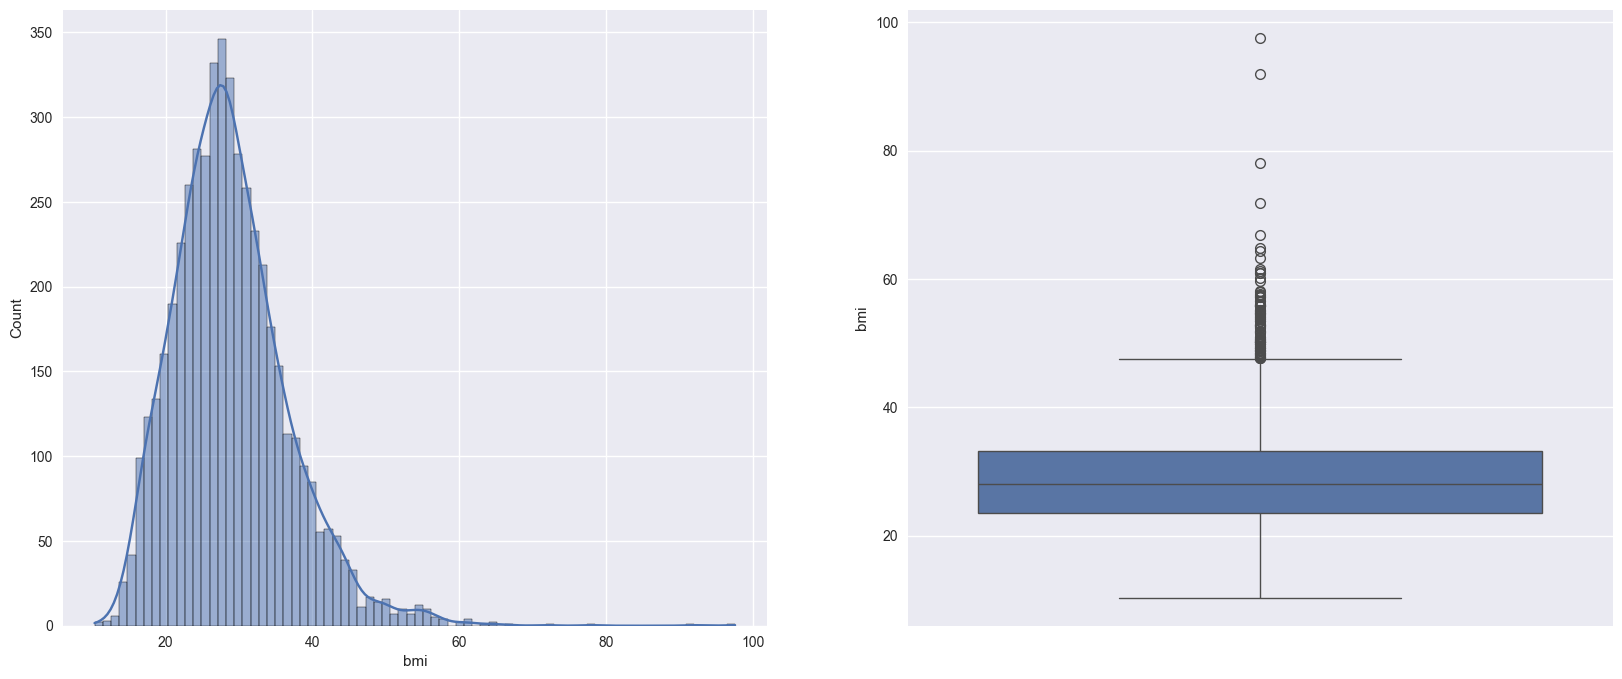

In [118]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
sns.histplot(data['bmi'],kde=True)

plt.subplot(1, 2, 2)
sns.boxplot(data['bmi'])

Interpretation: As we can see, the BMI feature is right-skewed and affected by outliers.

In [122]:
#finding the counts of Outliers 

Q1=data['bmi'].quantile(0.25) 
Q3=data['bmi'].quantile(0.75)
IQR=Q3-Q1
Total=(data['bmi'] < (Q1 - 1.5 * IQR)) | (data['bmi'] > (Q3 + 1.5 * IQR))
print(f"BMI Features Contains {Total.value_counts()[1]} Outliers")


BMI Features Contains 110 Outliers


In [128]:
data_bmi_stroke=data.loc[data['bmi'].isnull()]

print(f"BMI Features Contains {data_bmi_stroke['stroke'].value_counts()[1]} Null values with Stroke")
print(f"BMI Features has total  {data['stroke'].value_counts()[1]}  values with Stroke")



BMI Features Contains 40 Null values with Stroke
BMI Features has total  249  values with Stroke


Our BMI feature contains 40 null values, 40 of which belong to patients with stroke, while 161 belong to patients without stroke. Since the total number of stroke patients is 249, it's not possible to remove or drop the null values from the dataset.

Imputing Null Values:
1.	The mean cannot be used because the BMI feature is affected by outliers, which would skew the average and lead to inaccurate imputation.
2.	The median is a better choice for imputation since it is not affected by outliers, providing a more accurate representation of the central tendency.

In [131]:
median_bmi=data['bmi'].median()
median_bmi
data['bmi']=data['bmi'].fillna(median_bmi)